# Cuisine Analysis
---
## Goal
- Use Spoonacular API and the U.S. Department of Health and Human Services' 2015 Dietary Guidelines to evaluate the macronutrient profiles and accessibility for people with health-related dietary restrictions of a set cuisines.
## Questions
- What are the macronutrient profiles of certain cuisines?
- Which cuisines are most accessible to people with certain food intolerances/allergies?
- Is there a correlation between balanced macronutrient profiles and accessibility for people with certain food intolerances/allergies?
- Which cuisine is offers the most balanced macronutrient profile for an adult between the ages of 19-50, while being accessible to adults with food intolerances/allergies?
## Definitions
- "Macronutrient profiles": the ratio of the percentages of carbohydrates, protein, and fat on average for a servings of a recipe of a given cuisine
- "Accessibility": the percentage of recipes for a given cuisine that does not contain gluten or dairy
- "Balanced": description of a macronutrient profile that matches (within 5 percentage points) the recommended nutritional goals for carbohydrates, protein, and total fat for male and female adults ages 19-50
---

# DataFrame creation

In [9]:
# Dependencies and API key
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import scipy.stats
import json 
import requests

from API_key import API_key

In [10]:
#Retrieve 43 recipe IDs per cuisine (American, Chinese, Mexican)
cuisines = ["American", "Chinese", "Mexican"] 
recipe_data = []

base_url = "https://api.spoonacular.com/recipes/complexSearch"

number = 43

# for cuisine in cuisines:
for cuisine in cuisines:  
    target_url = f"{base_url}?apiKey={API_key}&cuisine={cuisine}&number={number}"
    
    recipe_info = requests.get(target_url).json()
    
# Parse out each ID in recipe batch
    for i in range(0, 43):
        recipe_id = recipe_info["results"][i]["id"]
        recipe_data.append({"ID": recipe_id})

# print(json.dumps(recipe_info, indent=4, sort_keys=True))    
recipe_data


[{'ID': 715424},
 {'ID': 646512},
 {'ID': 1046982},
 {'ID': 642540},
 {'ID': 639392},
 {'ID': 644581},
 {'ID': 633837},
 {'ID': 660395},
 {'ID': 638552},
 {'ID': 638764},
 {'ID': 660288},
 {'ID': 795749},
 {'ID': 636573},
 {'ID': 637631},
 {'ID': 642695},
 {'ID': 1096277},
 {'ID': 775621},
 {'ID': 637897},
 {'ID': 673457},
 {'ID': 662376},
 {'ID': 637265},
 {'ID': 657226},
 {'ID': 649141},
 {'ID': 641627},
 {'ID': 634888},
 {'ID': 1095894},
 {'ID': 635059},
 {'ID': 1697611},
 {'ID': 641845},
 {'ID': 638549},
 {'ID': 664011},
 {'ID': 660273},
 {'ID': 610281},
 {'ID': 662391},
 {'ID': 991010},
 {'ID': 650377},
 {'ID': 651190},
 {'ID': 637102},
 {'ID': 650546},
 {'ID': 1066893},
 {'ID': 1096060},
 {'ID': 665146},
 {'ID': 659058},
 {'ID': 716426},
 {'ID': 716311},
 {'ID': 644826},
 {'ID': 660231},
 {'ID': 663150},
 {'ID': 638642},
 {'ID': 638649},
 {'ID': 638369},
 {'ID': 663169},
 {'ID': 646425},
 {'ID': 656777},
 {'ID': 638722},
 {'ID': 667701},
 {'ID': 638714},
 {'ID': 643808},
 {'ID': 

In [11]:
#Convert recipe_data into a list of recipe IDs
recipe_id_list = [*[list(idx.values()) for idx in recipe_data ]]
recipe_id_list = [element for innerList in recipe_id_list for element in innerList]
recipe_id_list_string = map(str, recipe_id_list)
recipe_id_list_string = (','.join(recipe_id_list_string))
# print(len(recipe_id_list))

In [12]:
#split recipe_id_list for processing
recipe_id_list_pt1 = recipe_id_list[:len(recipe_id_list)//2]
recipe_id_list_pt2 = recipe_id_list[len(recipe_id_list)//2:]

In [13]:
#TEST REQUEST AND  VIEW JSON FORMAT
# base_url_2 = "https://api.spoonacular.com/recipes"
# target_url_2 = f"{base_url_2}/639413/information?apiKey={API_key}&includeNutrition=True"
# recipe_info_2 = requests.get(target_url_2).json()

# with open("myTest.json", "w") as f:
#   json.dump(recipe_info_2, f, indent=2)
# f.close()

In [14]:
#Retrieve cuisine, recipe name, ingredient list, protein/serving, carbs/serving, and fat/serving for each recipe ID
base_url_2 = "https://api.spoonacular.com/recipes"

recipe_data_pt1 = []

print('Beginning Data Retrieval')
print('------------------------')
# Parse out needed info from each recipe
for id in recipe_id_list_pt1:
    
    target_url_2 = f"{base_url_2}/{id}/information?apiKey={API_key}&includeNutrition=True"
    
    print('Processing', id)
    
    try:
        
        recipe_info_2 = requests.get(target_url_2).json()
        
        recipe_id = recipe_info_2["id"]
        recipe_title = recipe_info_2["title"]
        recipe_cuisine = recipe_info_2["cuisines"][0]
        recipe_gluten = recipe_info_2["glutenFree"]
        recipe_dairy = recipe_info_2['dairyFree']
        recipe_protein = recipe_info_2["nutrition"]["nutrients"][8]["amount"]
        recipe_carbs = recipe_info_2["nutrition"]["nutrients"][3]["amount"]
        recipe_fat = recipe_info_2["nutrition"]["nutrients"][1]["amount"]
        recipe_data_pt1.append({"ID": recipe_id,
                            "Title": recipe_title,
                            "Cuisine": recipe_cuisine,
                            "Gluten-free?": recipe_gluten,
                            "Dairy-free?": recipe_dairy,
                            "Protein/serving": recipe_protein,
                            "Carbs/serving": recipe_carbs,
                            "Fat/serving": recipe_fat})
        
    except:
        print("Recipe not found, skipping...")
        pass
    
print('------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
------------------------
Processing 715424
Processing 646512
Processing 1046982
Processing 642540
Processing 639392
Processing 644581
Processing 633837
Processing 660395
Processing 638552
Processing 638764
Processing 660288
Processing 795749
Processing 636573
Processing 637631
Processing 642695
Processing 1096277
Processing 775621
Processing 637897
Processing 673457
Processing 662376
Processing 637265
Processing 657226
Processing 649141
Processing 641627
Processing 634888
Processing 1095894
Processing 635059
Processing 1697611
Processing 641845
Processing 638549
Processing 664011
Processing 660273
Recipe not found, skipping...
Processing 610281
Recipe not found, skipping...
Processing 662391
Recipe not found, skipping...
Processing 991010
Recipe not found, skipping...
Processing 650377
Recipe not found, skipping...
Processing 651190
Recipe not found, skipping...
Processing 637102
Recipe not found, skipping...
Processing 650546
Recipe not found, skipping...
Proc

In [15]:
#save recipe_data_pt1 to csv
df = pd.DataFrame(recipe_data_pt1)
     
# saving the dataframe
df.to_csv('recipe_data_pt1.csv')


In [16]:
#Retrieve cuisine, recipe name, ingredient list, protein/serving, carbs/serving, and fat/serving for each recipe ID
base_url_2 = "https://api.spoonacular.com/recipes"

recipe_data_pt2 = []

print('Beginning Data Retrieval')
print('------------------------')
# Parse out needed info from each recipe
for id in recipe_id_list_pt2:
    
    target_url_2 = f"{base_url_2}/{id}/information?apiKey={API_key}&includeNutrition=True"
    
    print('Processing', id)
    
    try:
        
        recipe_info_2 = requests.get(target_url_2).json()
        
        recipe_id = recipe_info_2["id"]
        recipe_title = recipe_info_2["title"]
        recipe_cuisine = recipe_info_2["cuisines"][0]
        recipe_gluten = recipe_info_2["glutenFree"]
        recipe_dairy = recipe_info_2['dairyFree']
        recipe_protein = recipe_info_2["nutrition"]["nutrients"][8]["amount"]
        recipe_carbs = recipe_info_2["nutrition"]["nutrients"][3]["amount"]
        recipe_fat = recipe_info_2["nutrition"]["nutrients"][1]["amount"]
        recipe_data_pt2.append({"ID": recipe_id,
                            "Title": recipe_title,
                            "Cuisine": recipe_cuisine,
                            "Gluten-free?": recipe_gluten,
                            "Dairy-free?": recipe_dairy,
                            "Protein/serving": recipe_protein,
                            "Carbs/serving": recipe_carbs,
                            "Fat/serving": recipe_fat})
        
    except:
        print("Recipe not found, skipping...")
        pass
    
print('------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
------------------------
Processing 660707
Recipe not found, skipping...
Processing 638717
Recipe not found, skipping...
Processing 638668
Recipe not found, skipping...
Processing 659038
Recipe not found, skipping...
Processing 643786
Recipe not found, skipping...
Processing 643832
Recipe not found, skipping...
Processing 638631
Recipe not found, skipping...
Processing 659906
Recipe not found, skipping...
Processing 682619
Recipe not found, skipping...
Processing 652354
Recipe not found, skipping...
Processing 648475
Recipe not found, skipping...
Processing 662744
Recipe not found, skipping...
Processing 638693
Recipe not found, skipping...
Processing 643011
Recipe not found, skipping...
Processing 640323
Recipe not found, skipping...
Processing 649129
Recipe not found, skipping...
Processing 664551
Recipe not found, skipping...
Processing 664650
Recipe not found, skipping...
Processing 638729
Recipe not found, skipping...
Processing 664624
Recipe not found, sk

In [17]:
#create dataframe
recipe_data_pt2_df = pd.DataFrame(recipe_data_pt2)
     
# save the dataframe
df.to_csv('recipe_data_pt2.csv')

In [18]:
#read recipe_data_pt1.csv
recipe_data_pt1_df = pd.read_csv("recipe_data_pt1.csv", header = 0)

In [19]:
#Merge DataFrames
frames = [recipe_data_pt1_df, recipe_data_pt2_df]
recipe_data_df = pd.concat(frames, ignore_index = True)
recipe_data_df

,Unnamed: 0,ID,Title,Cuisine,Gluten-free?,Dairy-free?,Protein/serving,Carbs/serving,Fat/serving
0,0,715424,The Best Chili,American,True,True,33.42,34.93,6.95
1,1,646512,Salmon Caesar Salad,American,True,False,26.90,7.17,28.96
2,2,1046982,How to Make the Perfect Sweet Potato Sloppy Joes,American,True,True,48.91,84.96,18.06
3,3,642540,Falafel Burgers,American,False,True,23.31,80.23,35.46
4,4,639392,Chunky Two-Bean Chili,American,False,False,23.06,84.78,26.39
5,5,644581,Ginger Garlic Chili Salmon,American,True,True,34.59,14.94,10.85
6,6,633837,Baked Sweet Potato Fries,American,True,True,7.31,91.88,11.86
7,7,660395,Smokey Rainbow Chili,American,True,True,9.43,36.47,5.18
8,8,638552,Chili chops with cauliflower salad,American,True,False,33.69,25.56,25.87
9,9,638764,Chipotle Turkey Chili,American,True,False,51.63,42.81,21.95


# Macro-nutrient Profiles

Text(0, 0.5, 'Recommended Macro-nutrient Ratio')

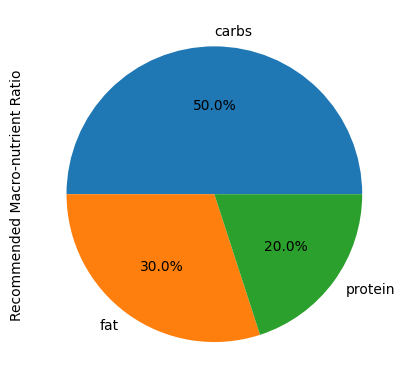

In [20]:
#Calculate macro-nutrient profile and create visualization for national recommendation and for each cuisine
#Recommended
percentages = [50, 30, 20]
labels = ["carbs", "fat", "protein"]

plt.pie(percentages, labels=labels, autopct='%1.1f%%')
plt.ylabel("Recommended Macro-nutrient Ratio")

Text(0, 0.5, 'American Cuisine Macro-nutrient Profile')

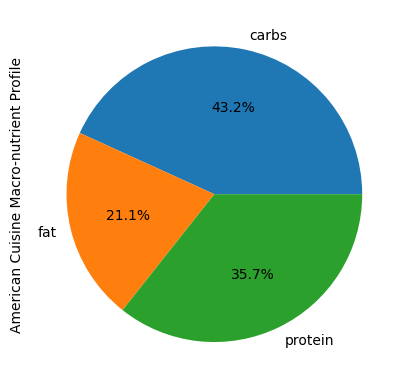

In [23]:
#American
am_carbs = recipe_data_df.loc[recipe_data_df['Cuisine'] == "American", 'Carbs/serving']
am_carbs = am_carbs.mean()

am_fat = recipe_data_df.loc[recipe_data_df['Cuisine'] == "American", 'Fat/serving']
am_fat = am_fat.mean()

am_protein = recipe_data_df.loc[recipe_data_df['Cuisine'] == "American", 'Protein/serving']
am_protein = am_protein.mean()

am_averages = [am_carbs, am_fat, am_protein]
labels = ["carbs", "fat", "protein"]

plt.pie(am_averages, labels=labels, autopct='%1.1f%%')
plt.ylabel("American Cuisine Macro-nutrient Profile")

In [28]:
#Chinese
ch_carbs = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Chinese", 'Carbs/serving']
print(ch_carbs)

ch_carbs = ch_carbs.mean()

ch_fat = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Chinese", 'Fat/serving']
ch_fat = ch_fat.mean()

ch_protein = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Chinese", 'Protein/serving']
ch_protein = ch_protein.mean()

ch_averages = [ch_carbs, ch_fat, ch_protein]
labels = ["carbs", "fat", "protein"]

plt.pie(ch_averages, labels=labels, autopct='%1.1f%%')
plt.ylabel("Chinese Cuisine Macro-nutrient Profile")

Series([], Name: Carbs/serving, dtype: float64)


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

In [25]:
#Mexican
mx_carbs = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Mexican", 'Carbs/serving']
mx_carbs = mx_carbs.mean()

mx_fat = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Mexican", 'Fat/serving']
mx_fat = mx_fat.mean()

mx_protein = recipe_data_df.loc[recipe_data_df['Cuisine'] == "Mexican", 'Protein/serving']
mx_protein = mx_protein.mean()

mx_averages = [mx_carbs, mx_fat, mx_protein]
labels = ["carbs", "fat", "protein"]

plt.pie(mx_averages, labels=labels, autopct='%1.1f%%')
plt.ylabel("Mexican Cuisine Macro-nutrient Profile")

ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

# Accessibility

In [ ]:
#Calculate percentage of recipes that contain gluten or dairy and create visualization per cuisine
# (dairy (milk, yogurt, cheese, butter, cream), 
# nuts (almonds, pecans, pistachios, walnuts, peanuts, peanut),
# gluten (wheat, [other grains], all-purpose flour, bread, breadcrumbs, dough)

In [ ]:
#American


In [ ]:
#Chinese

In [ ]:
#Mexican

# Statistical Analysis

In [ ]:
#Organize macro-nutrient profiles from least to most balanced (least to most closely matching UDH's recommendation)


In [ ]:
#Organize accessibility of each cuisine from least to most accessible 
#(highest to lowest percentage of recipes containing major allergens)

In [ ]:
#calculate line regression

#plot scatter plot

In [ ]:
#Identify most balanced and accessible cuisine(s)